<a href="https://colab.research.google.com/github/pietraataulo/woodpecker-december/blob/main/woodpecker_december.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🪵 Analisando visitas de um Pica-pau
Recentemente venho recebendo visitas inesperadas de um **Pica-pau-de-cabeça-amarela**, que acabaram se tornando mais frequentes do que eu esperava...

Então iniciei uma pesquisa para tentar encontrar padrões nessas visitas, e entender o porquê raios esse pica-pau gosta tanto da minha casa!?

Esse **dataset** contém os registros que coletei em **dezembro de 2025**, com as seguintes colunas:
> `id`: id do registro
>
> `name`: nome do pica-pau
>
> `date`: data da visita em horário militar (yyyy-MM-dd HH:mm)
>
> `side_of_balcony`: porção da sacada em que ele pousou (direita, esquerda ou centro)
>
> `duration_of_visit`: duração da visita em **minutos**
>
> `weather`: clima (nublado, chuvoso, ensolarado, ventoso)
>
> `group_size`: número de pica-paus
>
> `balcony`: qual sacada ele pousou (frente ou dos fundos)








## Leitura e visão geral dos dados

In [ ]:
# Importação de bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Carregando o dataset
df = pd.read_csv('woodpecker-december.csv')
df.head()

,id,name,date,side_of_balcony,duration_of_visit,weather,group_size,balcony
0,1,quick,2025-12-01 16:33,right,1,cloudy,2,back
1,2,quick,2025-12-03 09:09,right,3,cloudy,2,back
2,3,quick,2025-12-05 14:45,right,1,cloudy,1,back
3,4,quick,2025-12-05 15:07,right,1,cloudy,1,back
4,5,quick,2025-12-06 10:41,left,2,cloudy,2,back


In [ ]:
# Quantidade de linhas e colunas
df.shape

(49, 8)

In [ ]:
# Verificando o tipo das colunas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 49 non-null     int64 
 1   name               49 non-null     object
 2   date               49 non-null     object
 3   side_of_balcony    49 non-null     object
 4   duration_of_visit  49 non-null     int64 
 5   weather            49 non-null     object
 6   group_size         49 non-null     int64 
 7   balcony            49 non-null     object
dtypes: int64(3), object(5)
memory usage: 3.2+ KB


In [ ]:
# Medidas de posição e dispersão
df.describe()

,id,duration_of_visit,group_size
count,49.00000,49.000000,49.000000
mean,25.00000,2.469388,1.081633
std,14.28869,1.709069,0.276642
min,1.00000,1.000000,1.000000
25%,13.00000,1.000000,1.000000
50%,25.00000,2.000000,1.000000
75%,37.00000,3.000000,1.000000
max,49.00000,9.000000,2.000000


In [ ]:
# Verificando a frequência dos lados em que ele pousou
df['side_of_balcony'].value_counts()

,count
side_of_balcony,
right,22
center,17
left,10


In [ ]:
# Verificando os tipos de clima
df['weather'].unique()

array(['cloudy', 'sunny', 'rainy', 'windy'], dtype=object)

## Limpeza e transformações

In [ ]:
# Transformando a coluna date em datetime
df['date'] = pd.to_datetime(df['date'], format='mixed')

In [ ]:
# Criando uma coluna para dia
df['day'] = df['date'].dt.day

In [ ]:
# Criando uma coluna para mês
df['month'] = df['date'].dt.month

In [ ]:
# Criando uma coluna para hora
df['hour'] = df['date'].dt.hour

In [ ]:
# Criando uma coluna para minuto
df['minute'] = df['date'].dt.minute

In [ ]:
df.head()

,id,name,date,side_of_balcony,duration_of_visit,weather,group_size,balcony,day,month,hour,minute
0,1,quick,2025-12-01 16:33:00,right,1,cloudy,2,back,1,12,16,33
1,2,quick,2025-12-03 09:09:00,right,3,cloudy,2,back,3,12,9,9
2,3,quick,2025-12-05 14:45:00,right,1,cloudy,1,back,5,12,14,45
3,4,quick,2025-12-05 15:07:00,right,1,cloudy,1,back,5,12,15,7
4,5,quick,2025-12-06 10:41:00,left,2,cloudy,2,back,6,12,10,41


In [ ]:
df.describe()

,id,date,duration_of_visit,group_size,day,month,hour,minute
count,49.00000,49,49.000000,49.000000,49.000000,49.0,49.000000,49.000000
mean,25.00000,2025-12-15 08:50:14.693877760,2.469388,1.081633,14.857143,12.0,11.795918,28.204082
min,1.00000,2025-12-01 16:33:00,1.000000,1.000000,1.000000,12.0,6.000000,0.000000
25%,13.00000,2025-12-10 16:36:00,1.000000,1.000000,10.000000,12.0,10.000000,11.000000
50%,25.00000,2025-12-15 11:48:00,2.000000,1.000000,15.000000,12.0,12.000000,31.000000
75%,37.00000,2025-12-18 12:34:00,3.000000,1.000000,18.000000,12.0,14.000000,41.000000
max,49.00000,2025-12-30 12:42:00,9.000000,2.000000,30.000000,12.0,18.000000,58.000000
std,14.28869,NaN,1.709069,0.276642,7.164728,0.0,2.783729,17.641074


## Visualização

In [ ]:
# Aplicando um estilo padrão nos gráficos
plt.style.use('seaborn-v0_8')

### Qual a frequência de visitas por dia?

In [ ]:
visits_per_day = df['day'].value_counts()

In [ ]:
average_visits = visits_per_day.mean()

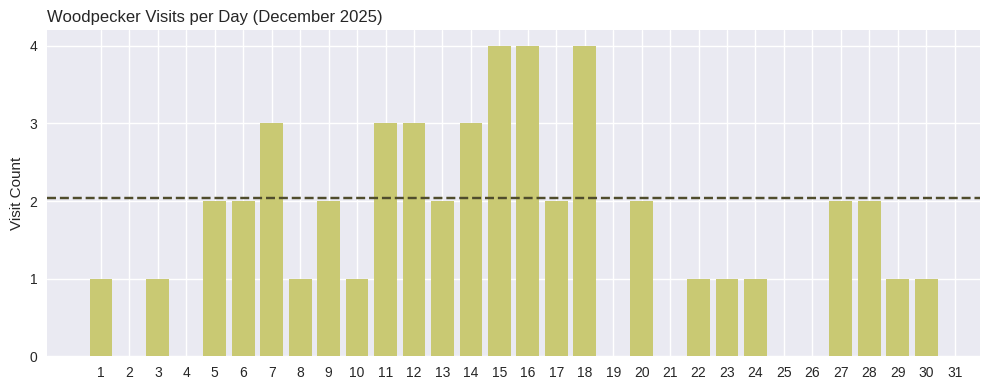

In [ ]:
plt.figure(figsize=(10,4))
plt.bar(visits_per_day.index, visits_per_day.values, color='#c9c973')

# plt.xlabel('Date')
plt.ylabel('Visit Count')
plt.title('Woodpecker Visits per Day (December 2025)', loc='left')
plt.yticks(range(0, 5, 1))
plt.xticks(range(1, 32))
plt.axhline(average_visits, color='#4f4c2c', linestyle='--', label='Average')
plt.tight_layout()
plt.show()

> O maior número de visitas em um único dia foi **4**, nos dias **15, 16 e 18**
>
> O traço marrom no gráfico indica a média de visitas por dia, que no caso é **2**
>> Enquanto nos dias **2, 4, 19, 21, 25, 26 e 31** não houve nenhuma visita 😞

### Em qual horário ele costuma visitar?

In [ ]:
# Calculando a frequência de visitas por hora
visits_per_hour = df['hour'].value_counts()

Text(0.0, 1.0, 'Visits per Hour')

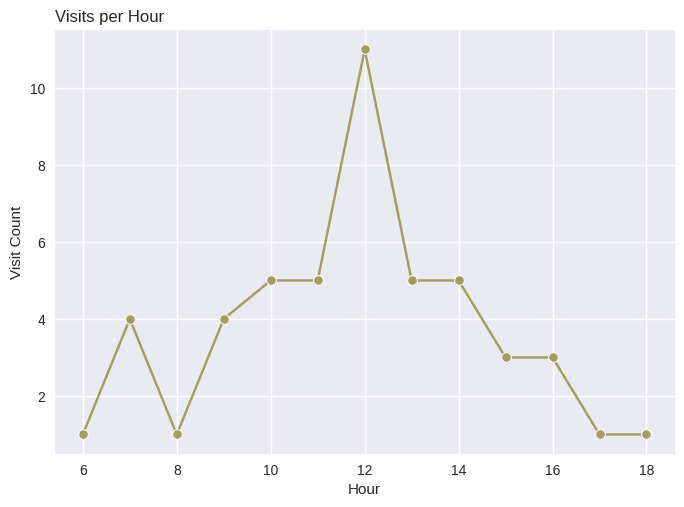

In [ ]:
# Plotando um gráfico de linha
sns.lineplot(x=visits_per_hour.index, y=visits_per_hour.values, marker='o', color='#a39d60')
plt.xlabel('Hour')
plt.ylabel('Visit Count')
plt.title('Visits per Hour', loc='left')

> O horário de pico é **12:00**, será que é o horário que ele almoça também?
>
> Enquanto **6:00** da manhã é o horário mínimo, **18:00** é o último horário do dia que ele visitou
>> 😆 Se você virar a cabeça para esquerda, o gráfico parece um pica-pau!

### Há alguma relação entre clima e visitas?

In [ ]:
# Calculando a frequência dos climas
weather_freq = df['weather'].value_counts().sort_values()

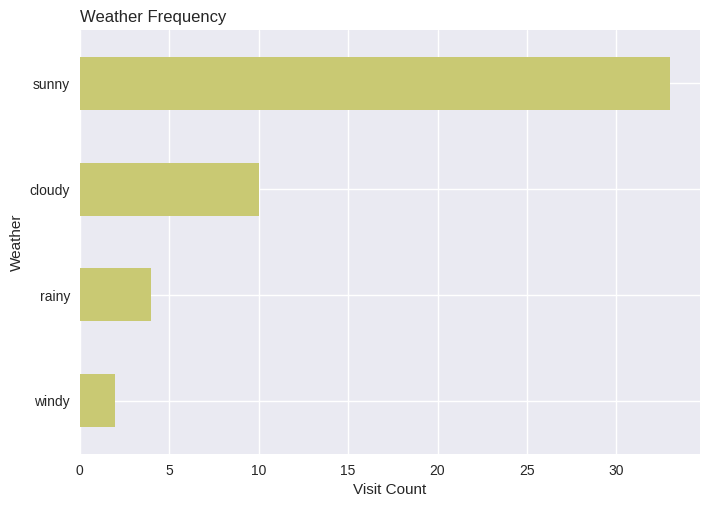

In [ ]:
weather_freq.plot(kind='barh', color='#c9c973')
plt.title('Weather Frequency', loc='left')
plt.xlabel('Visit Count')
plt.ylabel('Weather')
plt.show()

> Não há dúvidas que o pica-pau prefere um belo dia **ensolarado**, com mais de **30 visitas**! 🌞
>
> Já em dias **ventosos**, parece que ele não gosta muito de sair 💨

### Há alguma relação entre duração da visita e clima?

In [ ]:
duration_per_weather = df.groupby('weather')['duration_of_visit'].mean()

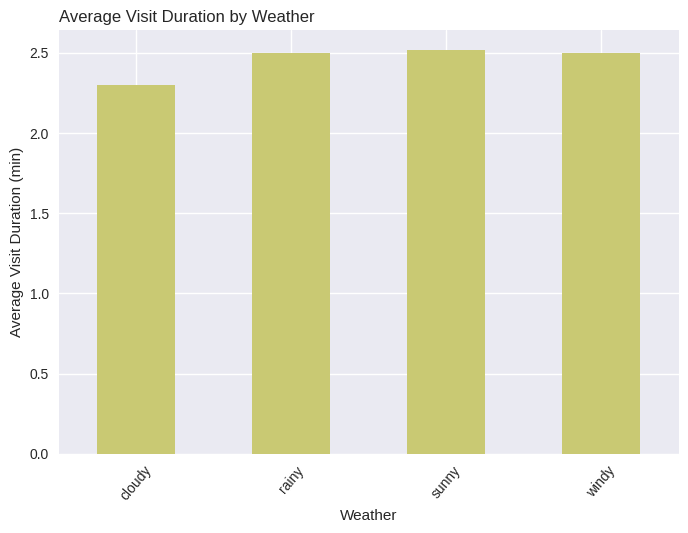

In [ ]:
duration_per_weather.plot(kind='bar', color='#c9c973')
plt.title('Average Visit Duration by Weather', loc='left')
plt.xlabel('Weather')
plt.ylabel('Average Visit Duration (min)')
plt.xticks(rotation=50)
plt.show()

> Não há uma relação forte entre **duração e clima**, porém ele tende ficar menos tempo em dias **nublados** ☁

### O pica-pau prefere a sacada da frente ou dos fundos?

In [ ]:
balcony_freq = df['balcony'].value_counts(normalize=True)

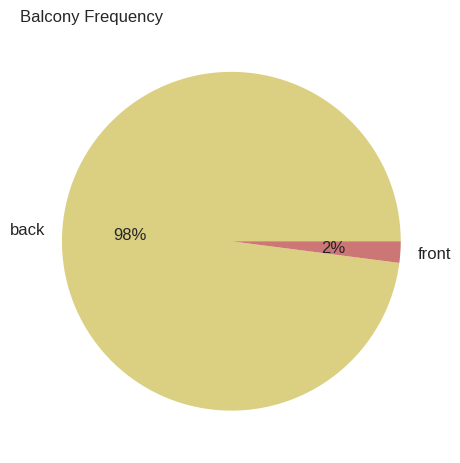

In [ ]:
balcony_freq.plot(kind='pie', autopct='%1.0f%%', colors=['#dbcf81', '#cc7676'], textprops={'fontsize': 12})
plt.title('Balcony Frequency', loc='left')
plt.ylabel('')
plt.show()

> A sacada dos **fundos** é a preferida dele, dominando **98%** das visitas!
>> Não posso negar que há realmente muitos inimigos na sacada da frente 🐦

### Qual porção da sacada o pica-pau prefere?

In [ ]:
side_freq = df['side_of_balcony'].value_counts().sort_values()

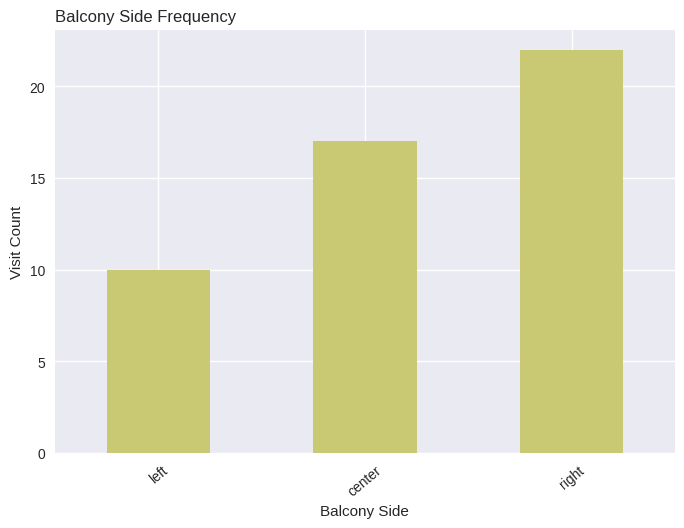

In [ ]:
side_freq.plot(kind='bar', color='#c9c973')
plt.title('Balcony Side Frequency', loc='left')
plt.xlabel('Balcony Side')
plt.ylabel('Visit Count')
plt.xticks(rotation=40)
plt.show()

> 👉 O pica-pau pousou no lado **direito** da sacada mais de **20** vezes!
>> Enquanto no lado **esquerdo** foram apenas **10**

### Qual a duração mínima e máxima das visitas?

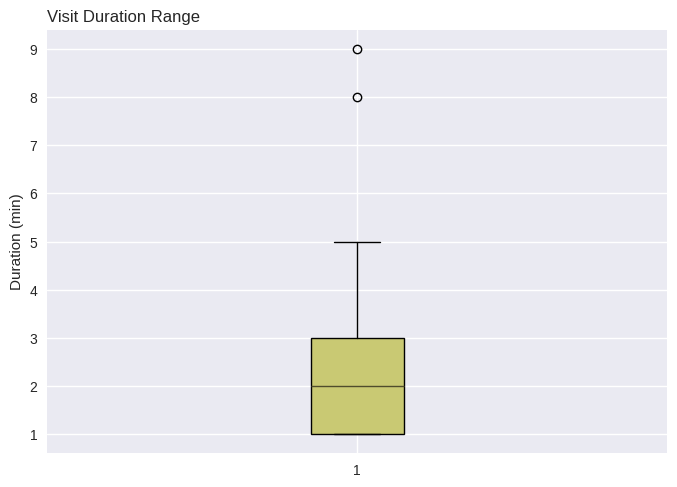

In [ ]:
# Plotando um diagrama de Caixa (boxplot)
plt.boxplot(df['duration_of_visit'], patch_artist=True, boxprops=dict(facecolor='#c9c973'), medianprops=dict(color='#4f4c2c'))
plt.title('Visit Duration Range', loc='left')
plt.ylabel('Duration (min)')
plt.show()

> A visita mais **curta** durou **1 minuto**, enquanto a visita mais **longa** durou **9 minutos**
>> **Interpretando um Boxplot:**
>> - A **caixa** amarela representa uma distruibuição de valores do **quartil 1 ao quartil 3**
>> - A **linha** que corta a caixa representa a **mediana**, ou **quartil 2**
>> - Os **bigodes** (T) representam valores mínimos e máximos **dentro** de um limite calculado por:
>>> Bigode inferior = Q1 - 1.5 x IQR \
>>> Bigode superior = Q3 + 1.5 x IQR
>> - Os **círculos** distantes representam valores discrepantes (outliers), valores que se distanciam demais da concentração de valores. Podem ser considerados mínimos e máximos quando queremos valores absolutos



 - Q1 = Quartil 1
 - Q3 = Quartil 3
 - IQR = Q3 - Q1




### O pica-pau costuma vir sozinho ou acompanhado?

In [ ]:
group_size_freq = df['group_size'].value_counts(normalize=True)

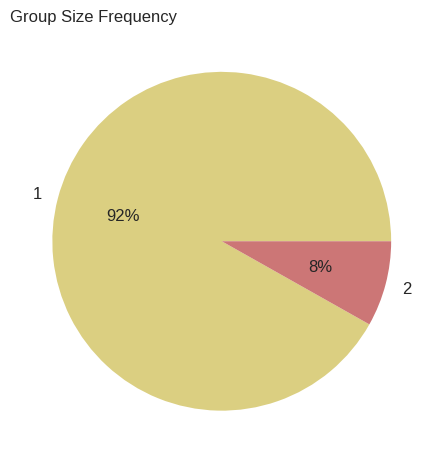

In [ ]:
group_size_freq.plot(kind='pie', autopct='%1.0f%%', colors=['#dbcf81', '#cc7676'], textprops={'fontsize': 12})
plt.ylabel('')
plt.title("Group Size Frequency", loc='left')
plt.show()

> Grande parte das vezes o pica-pau veio **sozinho**, enquanto em **8%** das visitas ele trouxe um **companheiro**
>> Parece que ele não curte muito se enturmar

---


<img src="https://media2.giphy.com/media/v1.Y2lkPTc5MGI3NjExZWIxYThseTJ3bmk0bmVoNHVxeWIxbjRidTV5YWptb2gzNG54aDI4ZyZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/cMUzjbVVaiel2/giphy.gif" width="300">